In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from functools import lru_cache
from collections import defaultdict, Counter

In [2]:
had_to_calculate = defaultdict(dict)
def increment(name):
    def wrapper(f):
        had_to_calculate[name]['cnt'] = 0
        had_to_calculate[name]['for_arg'] = Counter()
        def to_calculate(n):
            had_to_calculate[name]['cnt'] += 1
            had_to_calculate[name]['for_arg'][n] += 1
            return f(n)
        return to_calculate
    return wrapper

In [3]:
@np.vectorize
@increment('all_calls')
@lru_cache(maxsize = 64)
@increment('multiplication_persistence')
def multiplication_persistence(n):
    num_str = str(n)
    if len(num_str) == 1:
        return 0
    digits_multiplied_str = str(np.prod([int(i) for i in num_str]))
    digits_multiplied = int(''.join(sorted(digits_multiplied_str, reverse=True)))
    return 1 + multiplication_persistence(digits_multiplied)

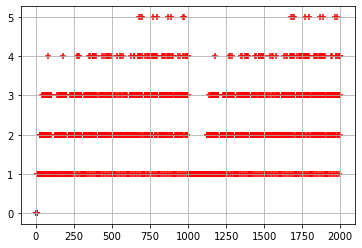

Had to calculate: 2,732
Call count: 7,239
Call to calculate ratio: 37.74%



In [4]:
x = np.arange(0, 2000)
y = multiplication_persistence(x)
plt.scatter(x, y, marker='+', c='r')
plt.grid(True)
plt.show()
print(f'''\
Had to calculate: {had_to_calculate["multiplication_persistence"]["cnt"]:,}
Call count: {had_to_calculate["all_calls"]["cnt"]:,}
Call to calculate ratio: {had_to_calculate["multiplication_persistence"]["cnt"] / 
                          had_to_calculate["all_calls"]["cnt"]:.2%}
''')


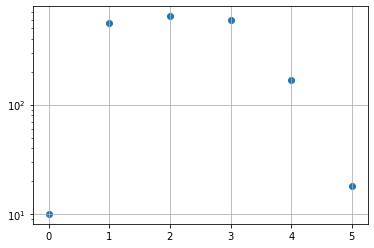

In [5]:
unique, counts = np.unique(y, return_counts=True)
plt.scatter(unique, counts)
plt.yscale('log')
plt.grid(True)
plt.show()

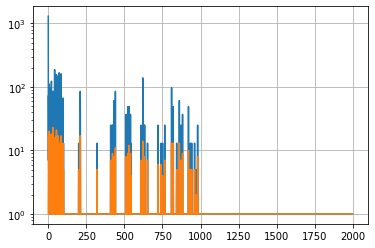

In [6]:
calls_to_function = had_to_calculate['multiplication_persistence']['for_arg']
calls_to_cache_wrapper = had_to_calculate['all_calls']['for_arg']

x, y = tuple(zip(*((k, calls_to_cache_wrapper[k]) for k in sorted(calls_to_cache_wrapper))))
plt.plot(x, y)

x, y = tuple(zip(*((k, calls_to_function[k]) for k in sorted(calls_to_function))))
plt.plot(x, y)
plt.yscale('log')
plt.grid(True)
plt.show()

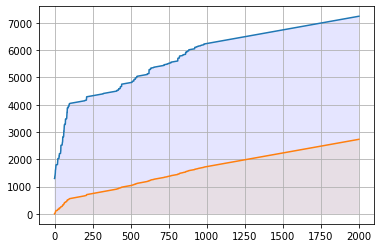

In [8]:
calls_to_function = had_to_calculate['multiplication_persistence']['for_arg']
calls_to_cache_wrapper = had_to_calculate['all_calls']['for_arg']

x, y = tuple(zip(*((k, calls_to_cache_wrapper[k]) for k in sorted(calls_to_cache_wrapper))))
y = np.cumsum(y)
plt.plot(x, y)
plt.fill_between(x, np.zeros(y.shape), y, facecolor='blue', alpha=0.1)

x, y = tuple(zip(*((k, calls_to_function[k]) for k in sorted(calls_to_function))))
y = np.cumsum(y)
plt.plot(x, y)
plt.fill_between(x, np.zeros(y.shape), y, facecolor='orange', alpha=0.1)
plt.grid(True)
plt.show()